# Introduction:
## SubMetric: Best neighborhood to break into cars.
Metric Description: I will determine the price of parking per neighborhood in order to determine the highest price neighborhoods for parking. If people have the money to park where it is expensive, then they are probably rich. If they are rich, then breaking into their car could prove to be a lucrative endeavor. If stealing the whole car is your deal, you can do that too.


![break](https://media.giphy.com/media/6K5iPG6h56epmMNHfs/giphy.gif)

Dataset: The dataset being analyzed is all of the data about parking meters in neighborhoods around and their rates. We will look at just the zone and rate of this data to determine which neighborhood has the highest parking rates. Logically, if someone has the audacity to park for a lot of money, then they have a lot of money. 

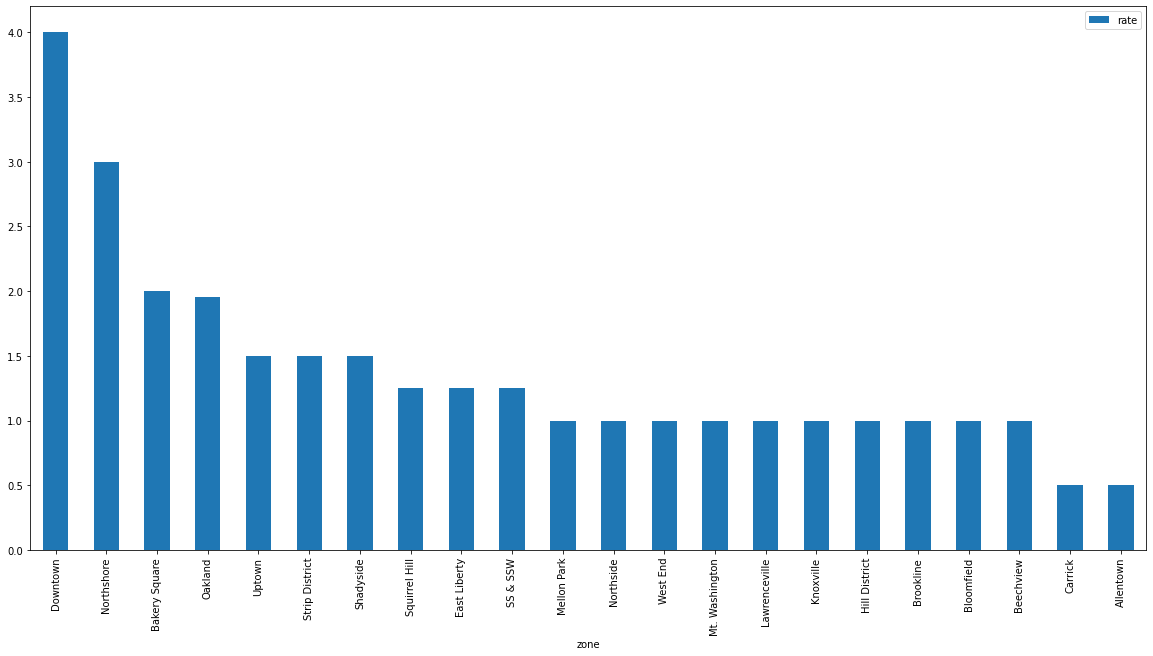

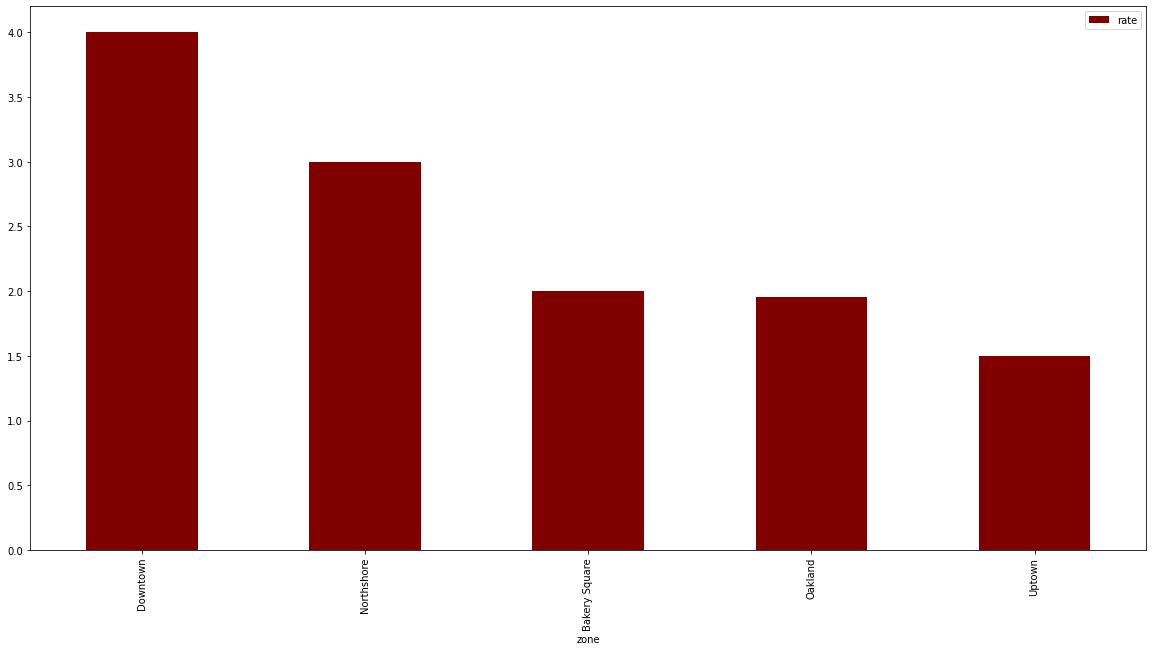

In [12]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#get rid of the nll values, they are useless
park = pd.read_csv("parking.tsv", sep="\t")
mask = ~park['rate'].isnull()
masked_park = park[mask]
masked_park.iloc[0:5,0:]

#print(masked_park[['zone', 'rate']].sample(15))

#general cleaning
df= masked_park[masked_park['rate']!="Multi-Rate"]
df.loc[0:,'rate'] = df.loc[0:,'rate'].replace({'\$': '', ',': '','/hr':'', '2 after 2pm':'','\(':'','\)':'','2.50 after 2pm':'',}, regex=True).astype(float)
df.loc[df['zone'].str.contains('Oakland'),'zone'] = 'Oakland'
df.loc[df['zone'].str.contains('Squirrel Hill'),'zone'] = 'Squirrel Hill'
df.loc[df['zone'].str.contains('SS & SSW'),'zone'] = 'SS & SSW'
df.loc[df['zone'].str.contains('Downtown'),'zone'] = 'Downtown'
df.loc[df['zone'].str.contains('Allentown'),'zone'] = 'Allentown'
df.loc[df['zone'].str.contains('Bloomfield'),'zone'] = 'Bloomfield'
df.loc[df['zone'].str.contains('Shadyside'),'zone'] = 'Shadyside'
df.loc[df['zone'].str.contains('NorthSide'),'zone'] = 'Northside'
df.loc[df['zone'].str.contains('Lawrenceville'),'zone'] = 'Lawrenceville'
df.loc[df['zone'].str.contains('Uptown'),'zone'] = 'Uptown'
df.loc[df['zone'].str.contains('Strip Disctrict'),'zone'] = 'Strip District'
df.loc[df['zone'].str.contains('Mellon Park'),'zone'] = 'Mellon Park'
df.loc[df['zone'].str.contains('Mt. Washington'),'zone'] = 'Mt. Washington'
df.loc[df['zone'].str.contains('Northshore'),'zone'] = 'Northshore'
df.loc[df['zone'].str.contains('Carrick'),'zone'] = 'Carrick'
df.loc[df['zone'].str.contains('Brookline'),'zone'] = 'Brookline'
df.loc[df['zone'].str.contains('Sheridan Kirkwood Lot'),'zone'] = 'East Liberty'
df.loc[df['zone'].str.contains('Hill District'),'zone'] = 'Hill District'
df.loc[df['zone'].str.contains('Beacon Bartlett Lot'),'zone'] = 'Squirrel Hill'
df.loc[df['zone'].str.contains('Sidney Lot'),'zone'] = 'SS & SSW'
df.loc[df['zone'].str.contains('Carson'),'zone'] = 'SS & SSW'
df.loc[df['zone'].str.contains('Beechview'),'zone'] = 'Beechview'
df.loc[df['zone'].str.contains('East Liberty'),'zone'] = 'East Liberty'
df.loc[df['zone'].str.contains('West End'),'zone'] = 'West End'
df.loc[df['zone'].str.contains('Knoxville'),'zone'] = 'Knoxville'
df.loc[df['zone'].str.contains('Bakery Sq'),'zone'] = 'Bakery Square'

#probably shouldn't do this but it really wont change the data all that much
df = df[df["zone"].str.contains("Lot") == False]

#clean up the duplicates. 
df.drop_duplicates(subset=['zone', 'rate'], keep='last')
#sort for ascending
df = df.sort_values('rate', ascending = False)

#copy over the array
df2 = df[['zone','rate']]
df2 = df2.drop_duplicates(subset=['zone','rate'])
#print(df[['zone', 'rate']])

#purge the index to reset it
df2 = df2.reset_index(drop=True)

#df.plot(x ='zone', y='rate', kind = 'scatter', figsize=(10,10))

#group up duplicate zones and set the value to the mean
dfa = df2.groupby('zone').mean()

#sort again
dfa =dfa.sort_values('rate',ascending = False)

#drop the index again
dfa = dfa.reset_index(drop=False)

#plot a righteous graph
dfa.plot.bar(x = 'zone', y ='rate', figsize=(20,10))


dfa_cleaner = dfa.head(5)

#plot a cleaner graph
dfa_cleaner.plot.bar(x = 'zone', y ='rate', figsize=(20,10), color = 'maroon')


# If you want to break into cars the best neighborhood is:

<span style="color:crimson; font-size:xx-large; font-style:bold"> Downtown! </span>.

![pitt](https://media.giphy.com/media/EBZZxeGUKuO4dfDJyw/giphy.gif)


# Happy Grand Theft Autoing !!!
![car](https://media.giphy.com/media/PlgNz2gB8Q2fm/giphy.gif)
